In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cf
import numpy as np

data = xr.open_dataset('adaptor.mars.external-1714054300.0526216-774-8-fed411fe-1bdd-44a4-a6b3-ebdd62c98e92.grib', engine='cfgrib')
data.to_netcdf('carra_1.nc')

In [2]:
ds = xr.open_dataset('carra_1.nc')
ds

<xarray.Dataset>
Dimensions:            (time: 16, heightAboveGround: 4, y: 989, x: 789)
Coordinates:
  * time               (time) datetime64[ns] 2008-07-01 ... 2008-08-31T18:00:00
    step               timedelta64[ns] ...
  * heightAboveGround  (heightAboveGround) float64 15.0 100.0 200.0 300.0
    latitude           (y, x) float64 ...
    longitude          (y, x) float64 ...
    valid_time         (time) datetime64[ns] ...
Dimensions without coordinates: y, x
Data variables:
    r                  (time, heightAboveGround, y, x) float32 ...
    t                  (time, heightAboveGround, y, x) float32 ...
    wdir               (time, heightAboveGround, y, x) float32 ...
    ws                 (time, heightAboveGround, y, x) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             enmi
    GRIB_centreDescription:  Oslo
    GRIB_subCentre:          255
    Conventions:             CF-1.7
    institution:             Oslo
    history:                 2024-04-25T14:27 GRIB to CDM+CF via cfgrib-0.9.1...

In [3]:
t = ds['t']
rh = ds['r']
wdir = ds['wdir']
wspd = ds['ws']

In [4]:
lat = ds.latitude
lon = ds.longitude
time = ds.time

In [5]:
lonW = 10
lonE = 20
latS = 75
latN = 85
cLat, cLon = (latS + latN)/2, (lonW + lonE)/2

In [6]:
height = 15

In [7]:
t = t.sel(heightAboveGround=height)
rh = rh.sel(heightAboveGround=height)
wdir = wdir.sel(heightAboveGround=height)
wspd = wspd.sel(heightAboveGround=height)

In [8]:
import metpy.calc as mpcalc
from metpy.units import units

In [9]:
wdir=wdir*units('deg')

In [10]:
u, v = mpcalc.wind_components(speed=wspd, wind_direction=wdir)

In [11]:
proj_map = ccrs.LambertConformal(central_longitude=cLon, central_latitude=cLat)
proj_data = ccrs.PlateCarree()
res = '10m'

Text(0.5, 1.0, '2008-07-31 00 UTC')

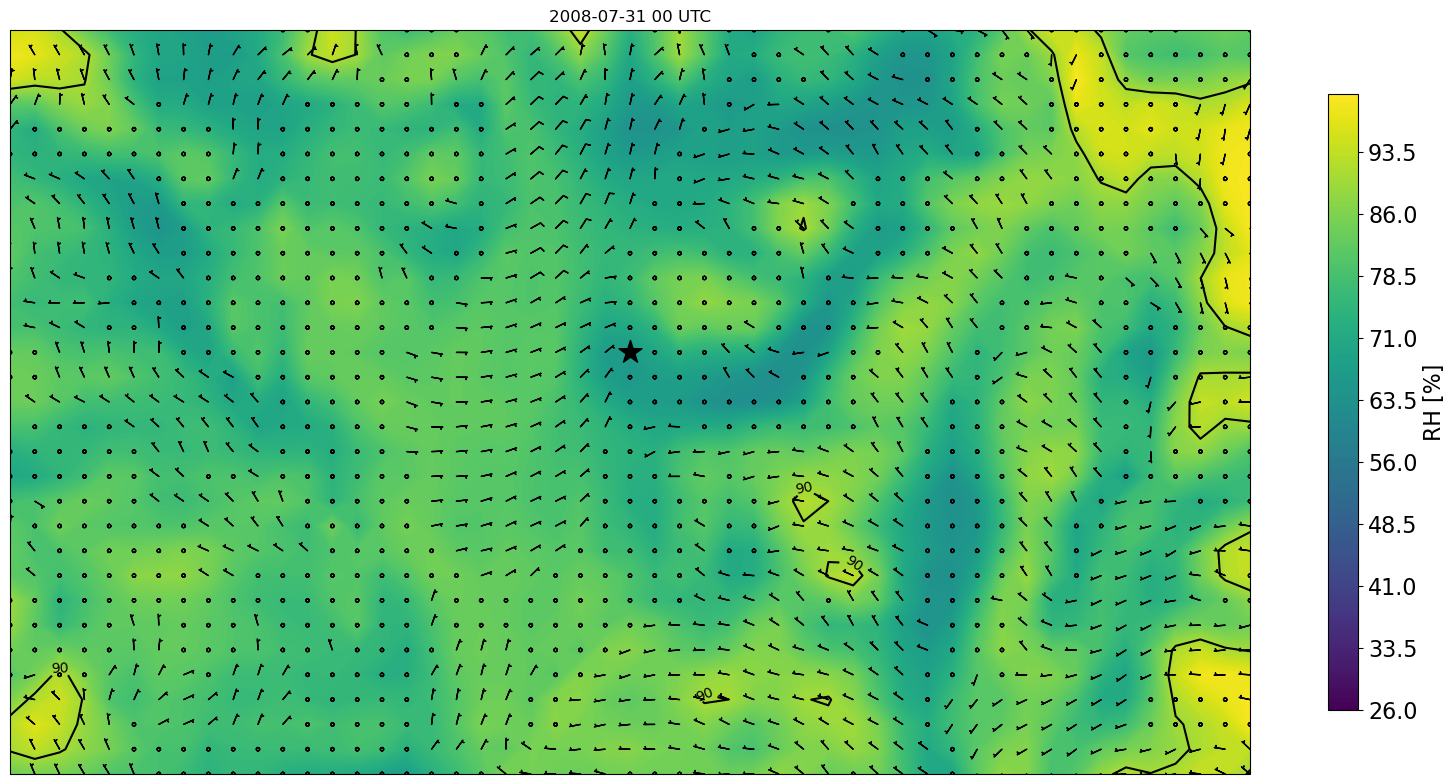

In [12]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-07-31T00:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-07-31T00:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-07-31T00:00:00.000000000')[::skip,::skip],v.sel(time='2008-07-31T00:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-07-31 00 UTC')

Text(0.5, 1.0, '2008-07-31 06 UTC')

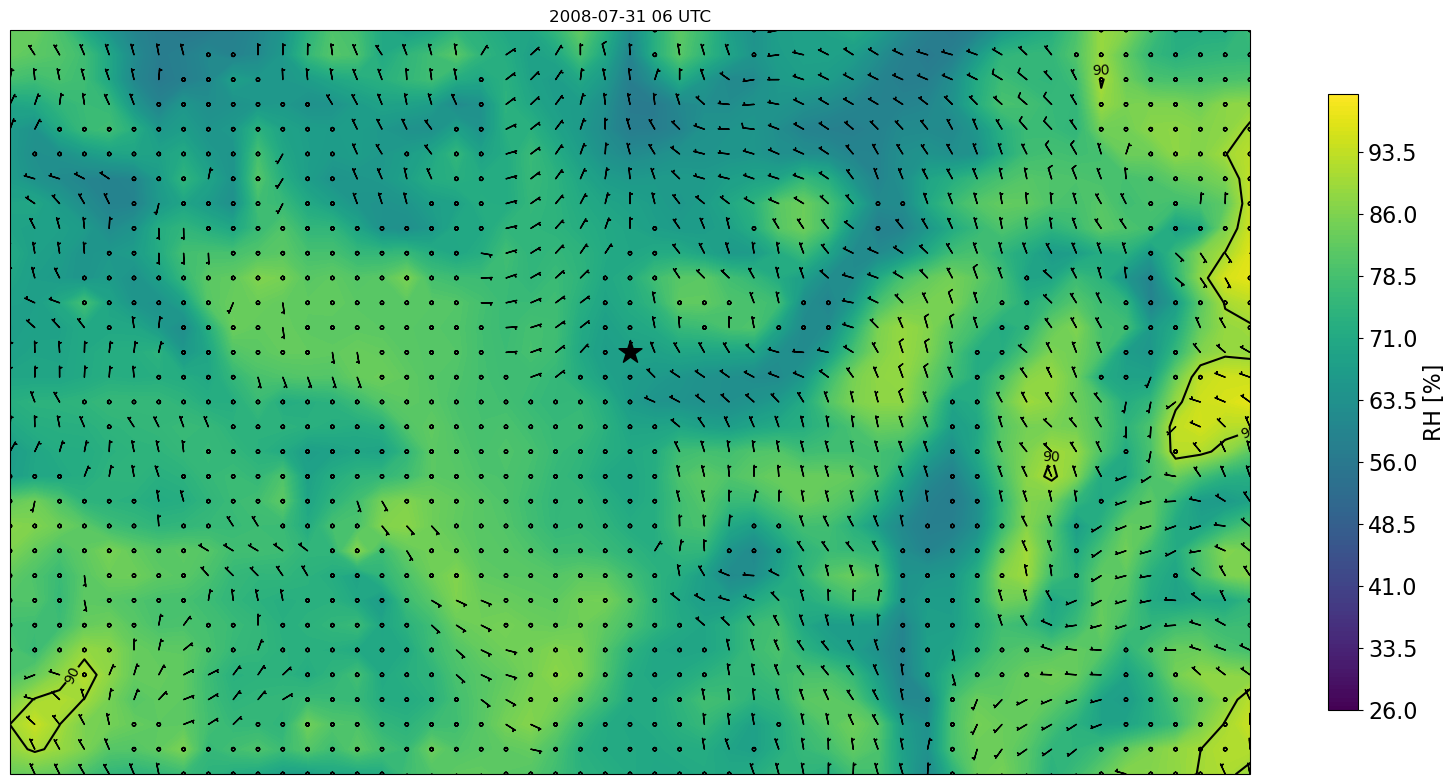

In [13]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-07-31T06:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-07-31T06:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-07-31T06:00:00.000000000')[::skip,::skip],v.sel(time='2008-07-31T06:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-07-31 06 UTC')

Text(0.5, 1.0, '2008-07-31 12 UTC')

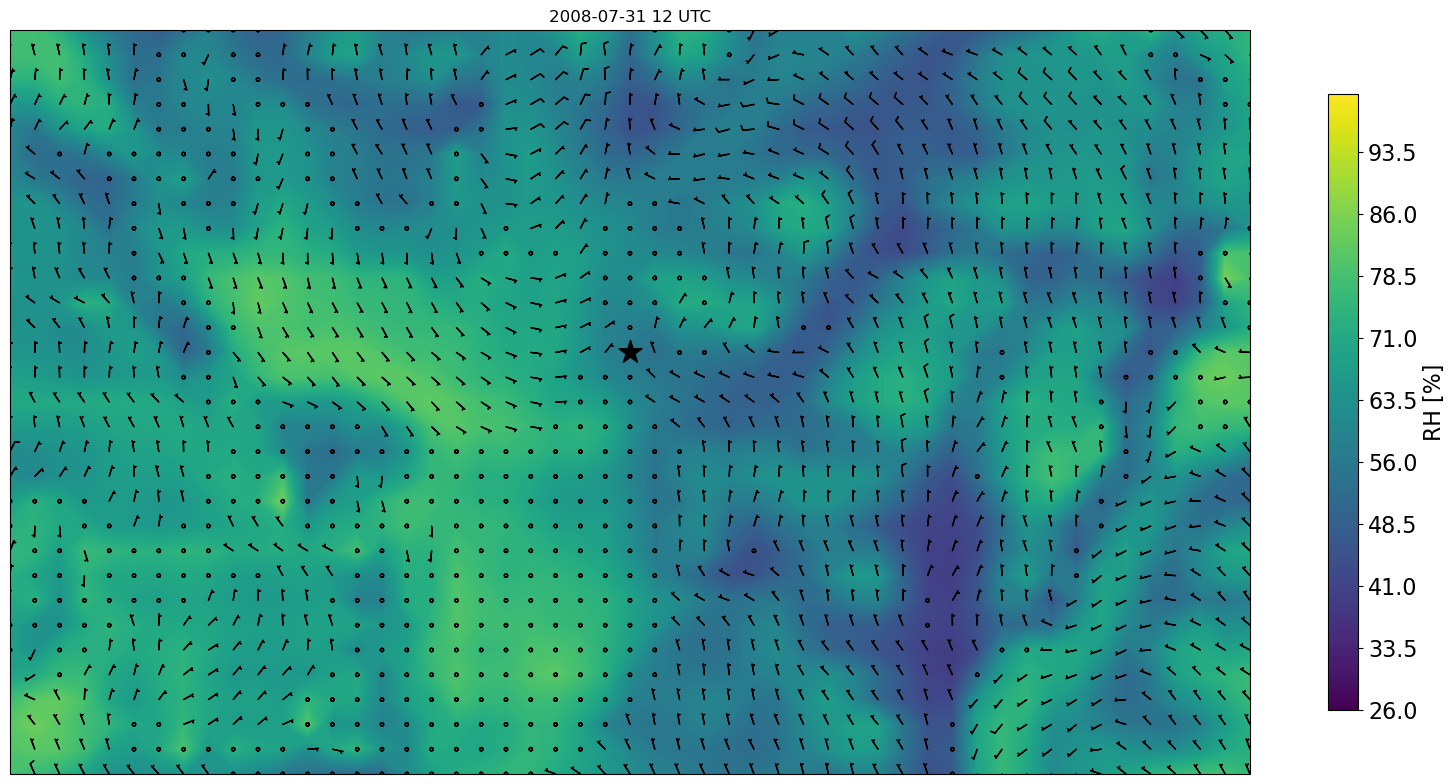

In [14]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-07-31T12:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-07-31T12:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-07-31T12:00:00.000000000')[::skip,::skip],v.sel(time='2008-07-31T12:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-07-31 12 UTC')

Text(0.5, 1.0, '2008-07-31 18 UTC')

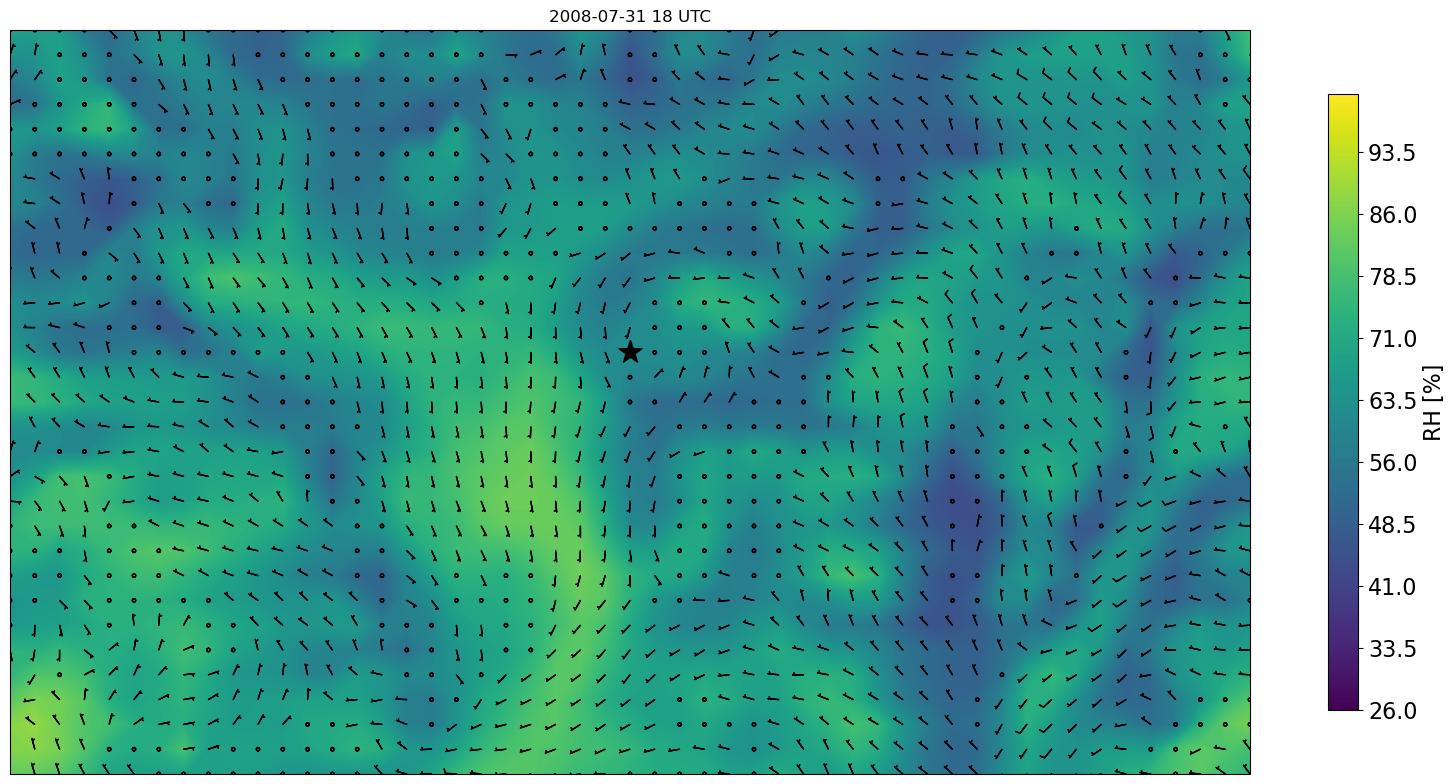

In [15]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-07-31T18:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-07-31T18:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-07-31T18:00:00.000000000')[::skip,::skip],v.sel(time='2008-07-31T18:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-07-31 18 UTC')

Text(0.5, 1.0, '2008-08-01 00 UTC')

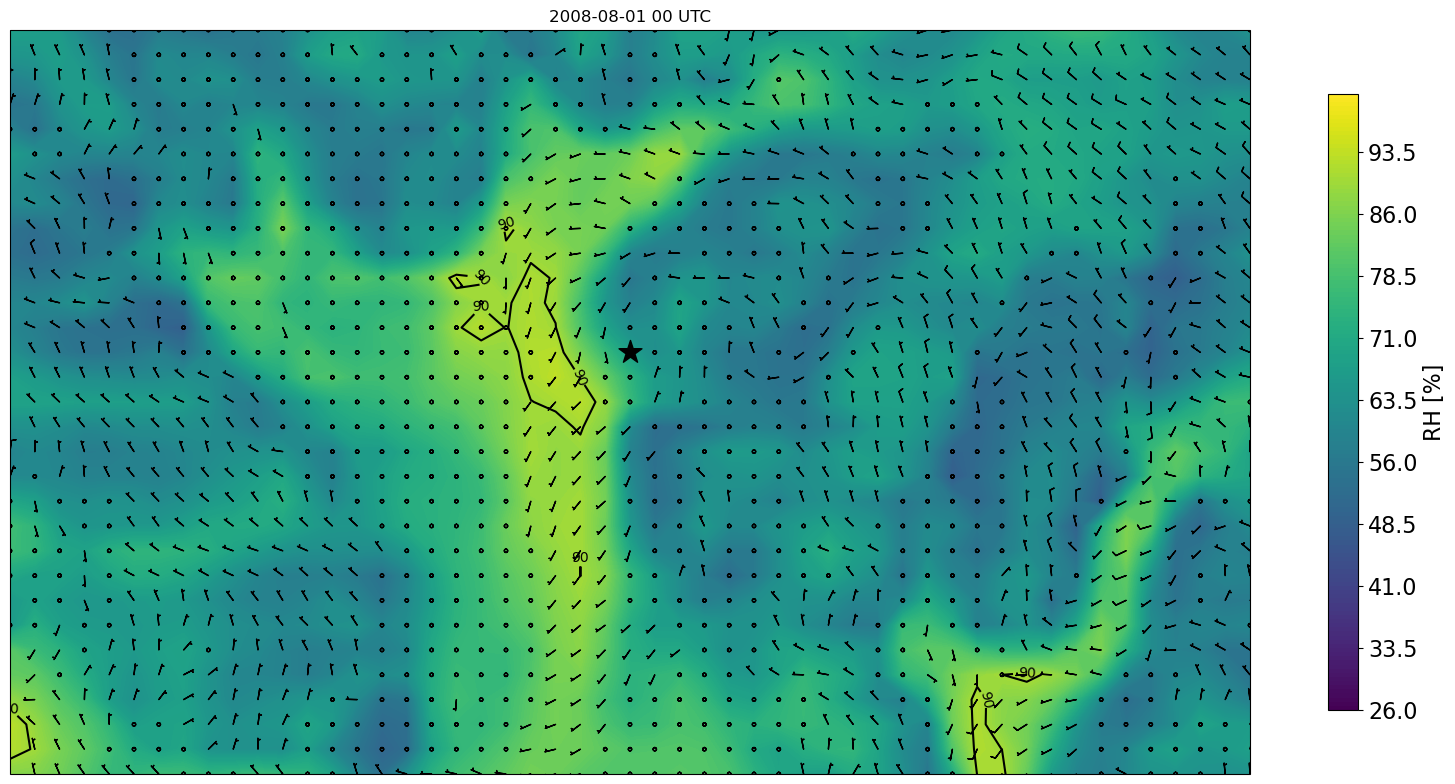

In [16]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-08-01T00:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-08-01T00:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-08-01T00:00:00.000000000')[::skip,::skip],v.sel(time='2008-08-01T00:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-08-01 00 UTC')

Text(0.5, 1.0, '2008-08-01 06 UTC')

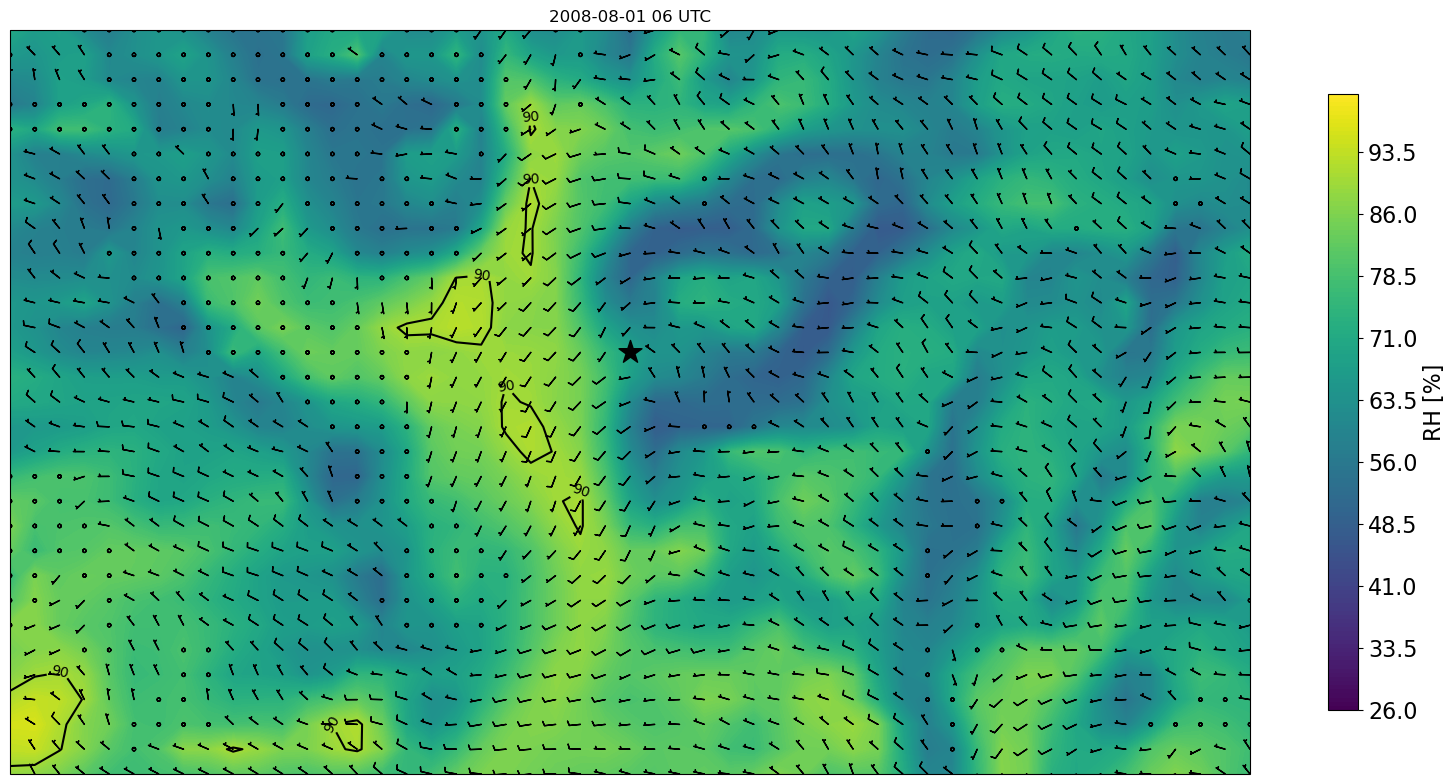

In [17]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-08-01T06:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-08-01T06:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-08-01T06:00:00.000000000')[::skip,::skip],v.sel(time='2008-08-01T06:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-08-01 06 UTC')

Text(0.5, 1.0, '2008-08-01 12 UTC')

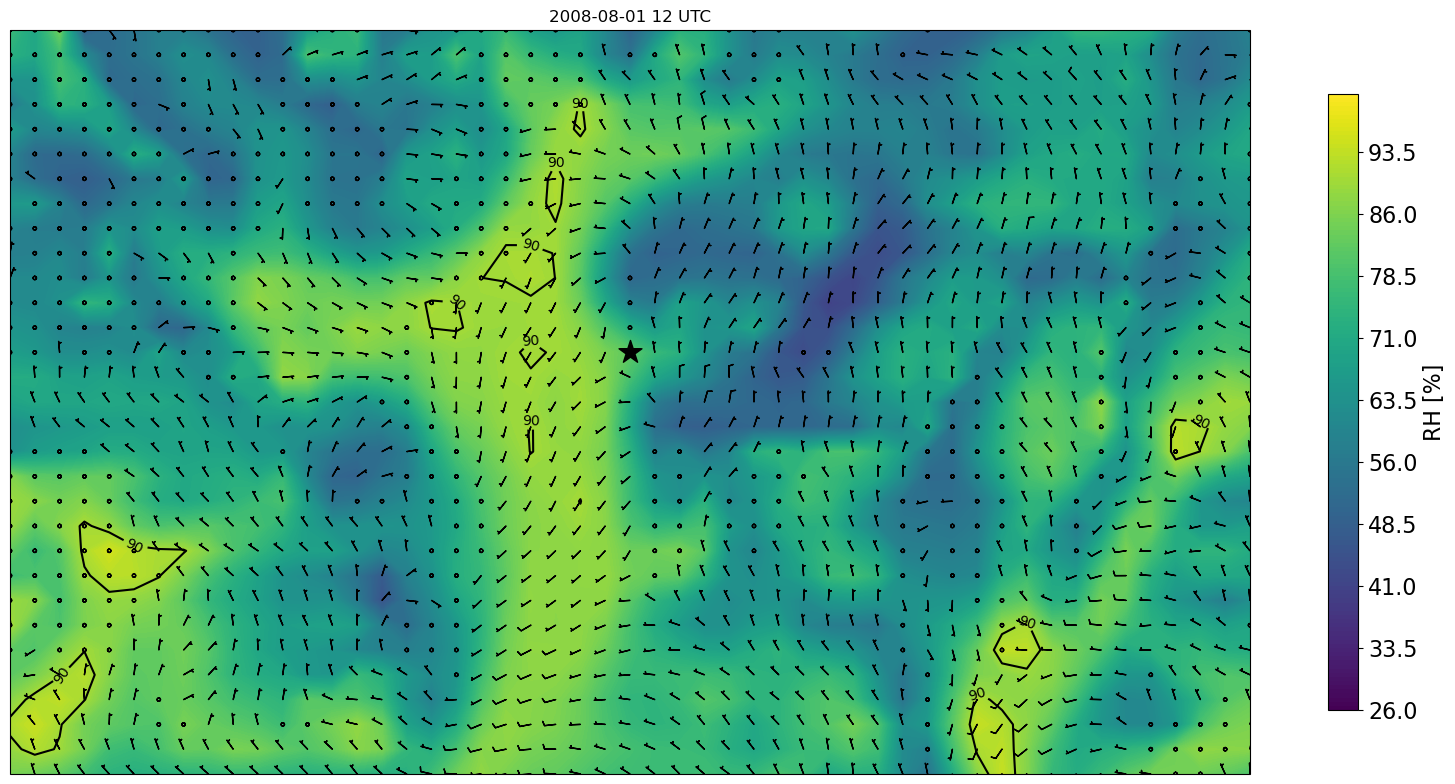

In [18]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-08-01T12:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-08-01T12:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-08-01T12:00:00.000000000')[::skip,::skip],v.sel(time='2008-08-01T12:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-08-01 12 UTC')

Text(0.5, 1.0, '2008-08-01 18 UTC')

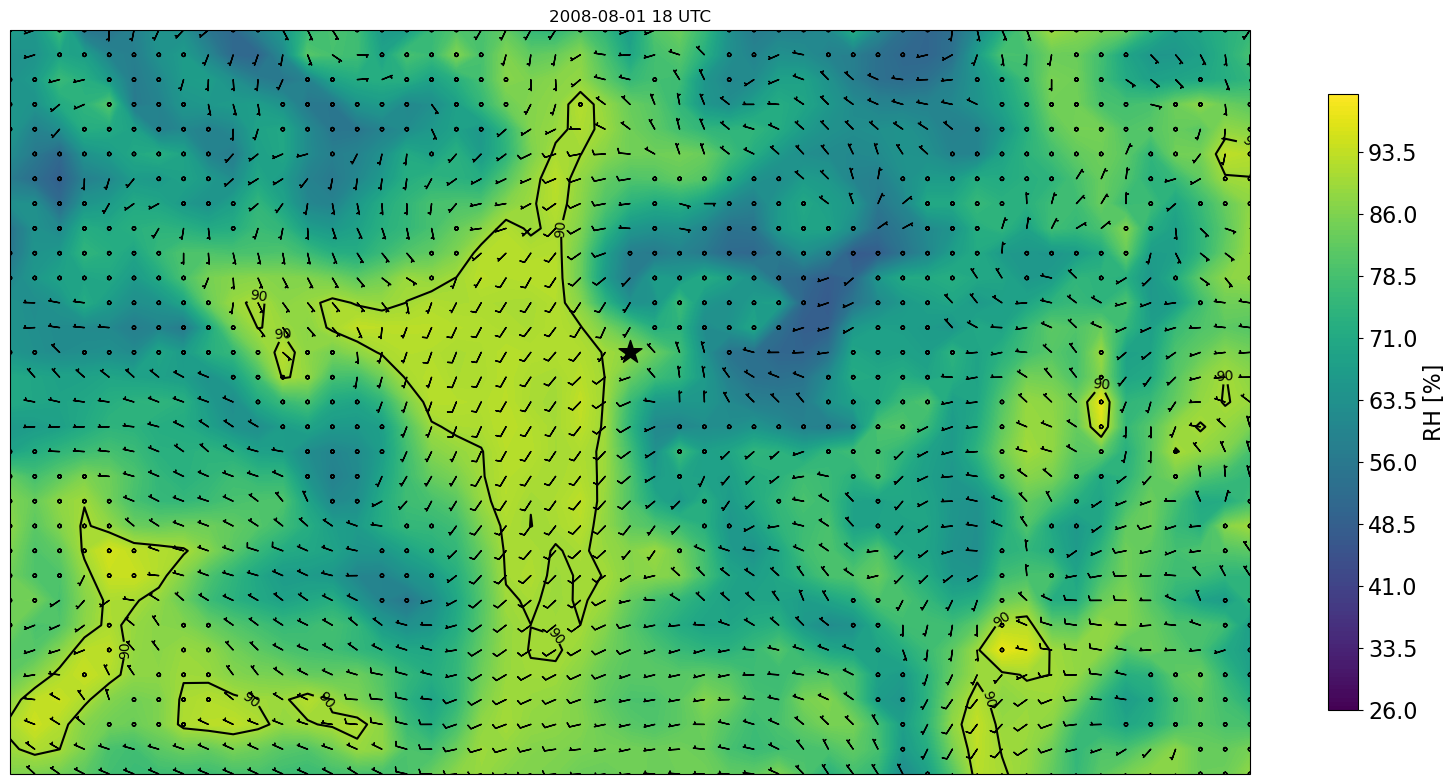

In [19]:
fig = plt.figure(figsize=(20,16))
ax = plt.subplot(1,1,1,projection=proj_map)
ax.set_xlim(150, 200)
ax.set_ylim(500, 530)
CF = ax.contourf(ds.x, ds.y, rh.sel(time='2008-08-01T18:00:00.000000000'), levels=np.arange(26, 101, .5))
cbar = plt.colorbar(CF,shrink=0.5)
cbar.ax.tick_params(labelsize=16)
cbar.ax.set_ylabel('RH [%]',fontsize=16)
CL = ax.contour(ds.x, ds.y, rh.sel(time='2008-08-01T18:00:00.000000000'), levels=np.arange(90, 105, 10), colors='k')
ax.clabel(CL)
ax.add_feature(cf.COASTLINE.with_scale(res))
skip = 1
ax.barbs(ds.x[::skip],ds.y[::skip],u.sel(time='2008-08-01T18:00:00.000000000')[::skip,::skip],v.sel(time='2008-08-01T18:00:00.000000000')[::skip,::skip],length=4)
ax.scatter(175, 517, marker='*', s=300, color='k')
ax.set_title('2008-08-01 18 UTC')